In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import glob, os
params = {'legend.fontsize': 'large',
#          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large',
         "legend.title_fontsize":'x-large'}
plt.rcParams.update(params)
import pandas as pd

In [2]:
def read_xi(filename):
    f = h5py.File(filename, "r")
    r = f["full_result/Bin_centre"][...]
    xi = f["full_result/xi"][...]
    xi=np.where(xi<1E-1,np.NaN,xi)
    f.close()
    return r[1:-1], xi[1:-1]

In [3]:
def plotxi(folder='PIPcorr/results/',text='Full Parent',xmin=2E-2,xmax=30,ymin=1E-2,ymax=1E4,emin=0.6,emax=1.1):
    r_p, xi_p = read_xi(folder+"monopole_parent.hdf5")
    r_t, xi_t = read_xi(folder+"monopole_targeted.hdf5")
    r_tp, xi_tp = read_xi(folder+"monopole_pip.hdf5")
    plt.figure(figsize=(18,5))
    plt.subplot(1,2,1)
    #plt.title(text)
    plt.plot(r_p, xi_p, linestyle='-', c='k', label="Parent sample")
    plt.plot(r_p, xi_t, linestyle='-', c='b', label="Targeted")
    plt.plot(r_p, xi_tp, linestyle='-', c='r', label="Targeted + PIP")
    plt.legend(loc="upper right", title=text).draw_frame(False)
    plt.xscale("log")
    plt.yscale("log")
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel(r"$r$ (Mpc/h)")
    plt.ylabel(r"$\xi(r)$")
    plt.subplot(1,2,2)
    #plt.title(text)
    plt.plot(r_p, xi_p/xi_p, linestyle='-', c='k', label="Parent sample")
    plt.plot(r_t, xi_t/xi_p, linestyle='-', c='b', label="Targeted")
    plt.plot(r_tp, xi_tp/xi_p, linestyle='-', c='r', label="Targeted + PIP")
    plt.hlines(1.05,xmin,xmax,linestyles='--',color='g',lw=1)
    plt.hlines(0.95,xmin,xmax,linestyles='--',color='g',lw=1)
    plt.hlines(1.02,xmin,xmax,linestyles='--',color='orange',lw=1)
    plt.hlines(0.98,xmin,xmax,linestyles='--',color='orange',lw=1)
    plt.legend(loc="lower right", title=text).draw_frame(False)
    plt.xscale("log")
    #plt.ylim(emin,emax)
    plt.xlim(xmin, xmax)
    plt.xlabel(r"$r$ (Mpc/h)")
    plt.ylabel(r"Ratio $\xi(r)/\xi_p(r)$")
    plt.show()
    return

In [4]:
def plotxi2(folder='PIPcorr/results/',text='Full Parent',xmin=2E-2,xmax=30,ymin=1E-2,ymax=1E4,emin=0.6,emax=1.1, sample='BGS'):
    r_p, xi_p = read_xi(folder+"monopole_parent.hdf5")
    r_t, xi_t = read_xi(folder+"monopole_targeted.hdf5")
    r_tp, xi_tp = read_xi(folder+"monopole_pip.hdf5")
    fig1 = plt.figure(figsize=(8,6))
    frame1=fig1.add_axes((.1,.3,.8,.6))
    plt.loglog(r_p, xi_p, linestyle='-', c='k', label="Parent sample")
    plt.loglog(r_p, xi_t, linestyle='-', c='b', label="Targeted")
    plt.loglog(r_p, xi_tp, linestyle='-', c='r', label="Targeted + PIP")
    plt.ylabel(r"$\xi(r)$")
    plt.legend(title=sample+" sample "+"("+text+")")
    plt.xticks()
    plt.yticks()
    plt.xlim(xmin, xmax)
    frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
    #Residual plot
    frame2=fig1.add_axes((.1,.09,.8,.2))        
    plt.semilogx(r_p, xi_p/xi_p, linestyle='-', c='k', label="Parent sample")
    plt.semilogx(r_t, xi_t/xi_p, linestyle='-', c='b', label="Targeted")
    plt.semilogx(r_tp, xi_tp/xi_p, linestyle='-', c='r', label="Targeted + PIP")
    plt.xlabel("$r$ ($h^{-1}$Mpc)")
    plt.hlines(1.05,xmin,xmax,linestyles='--',color='g',lw=1)
    plt.hlines(0.95,xmin,xmax,linestyles='--',color='g',lw=1)
    plt.hlines(1.02,xmin,xmax,linestyles='--',color='orange',lw=1)
    plt.hlines(0.98,xmin,xmax,linestyles='--',color='orange',lw=1)
    plt.ylabel(r"$\xi(r)/\xi_p(r)$")
    plt.xlabel("$r$ ($h^{-1}$Mpc)")
    plt.xticks()
    plt.yticks()
    plt.xlim(xmin, xmax)
    plt.ylim(emin,emax)
    plt.savefig("correlfunctPIP"+sample+".pdf",bbox_inches='tight')
    plt.show()
    return

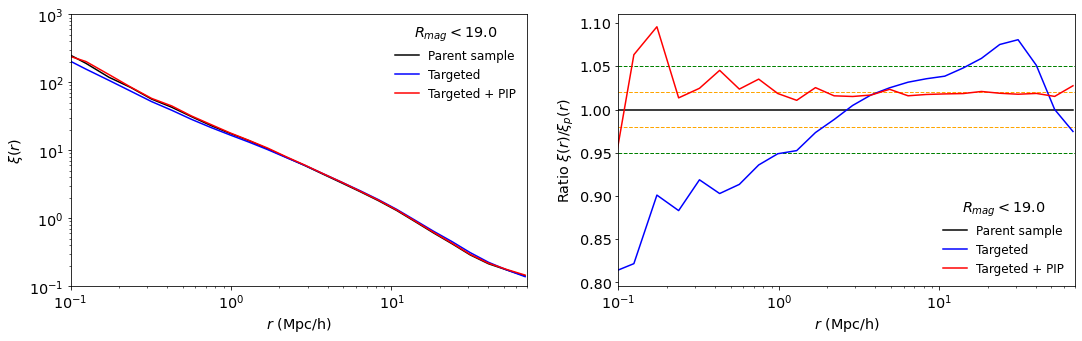

In [5]:
plotxi('clus_files_pip/results_bgs190/',r'$R_{mag}<19.0$', 1E-1, 7E1, 1E-1, 1E3, 0.7, 1.1)

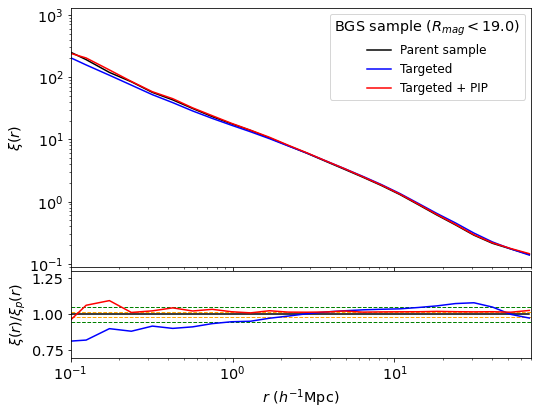

In [6]:
plotxi2('clus_files_pip/results_bgs190/',r'$R_{mag}<19.0$', 1E-1, 7E1, 1E-1, 1E3, 0.7, 1.3, sample="BGS")

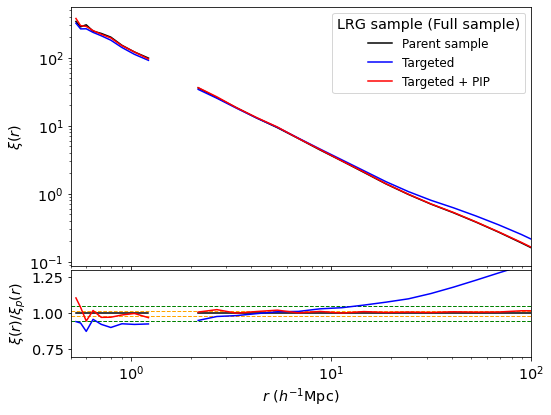

In [7]:
plotxi2('clus_files_pip/results_lrg/',r'Full sample', 5E-1, 1E2, 1E-1, 1E3, 0.7, 1.3, sample="LRG")

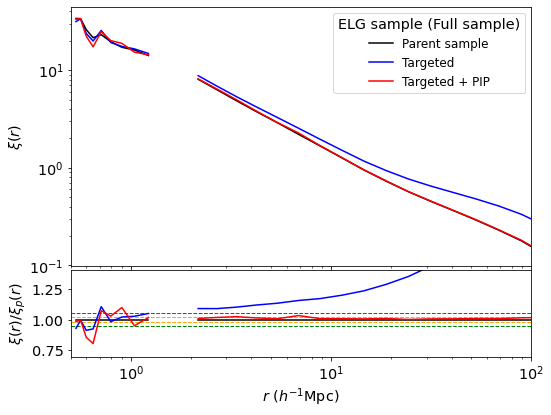

In [8]:
plotxi2('clus_files_pip/results_elg/',r'Full sample', 5E-1, 1E2, 1E-1, 1E3, 0.7, 1.4, sample="ELG")